In [81]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.model_selection import train_test_split
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [82]:
print('Rows =>',df.shape[0])
print('column =>',df.shape[1])

Rows => 200
column => 5


In [83]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [84]:

df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [85]:

df.size

1000

In [86]:

df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [87]:

df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [88]:

df.duplicated().sum()

np.int64(0)

In [89]:

df[:6]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


C:\Users\DELL\AppData\Local\Temp\ipykernel_22472\4097074093.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df,vert=False,data = df,labels=df.columns)


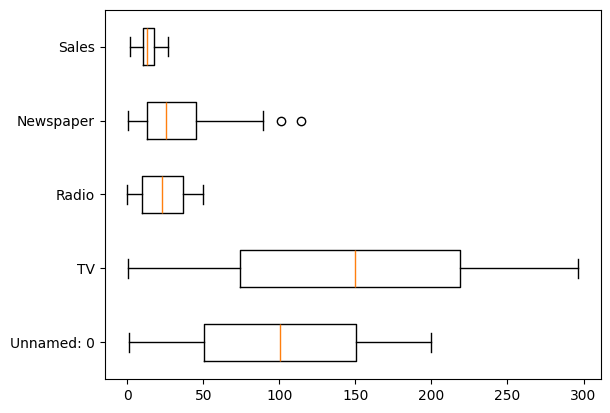

In [90]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

's'

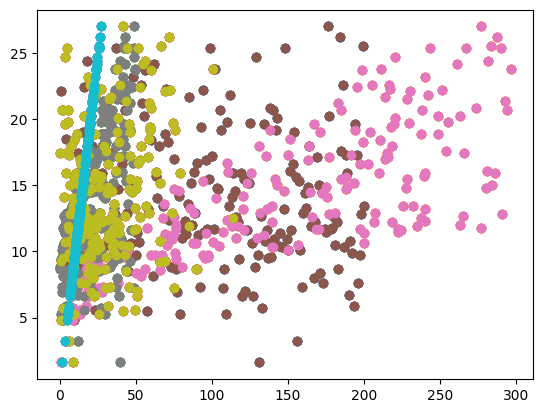

In [91]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

<Axes: xlabel='Newspaper', ylabel='Count'>

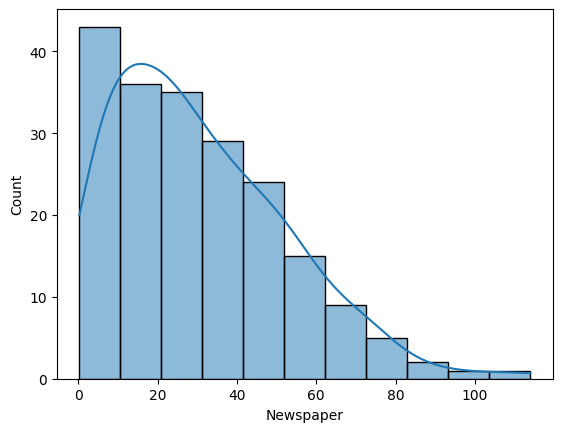

In [92]:

sns.histplot(df['Newspaper'], kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

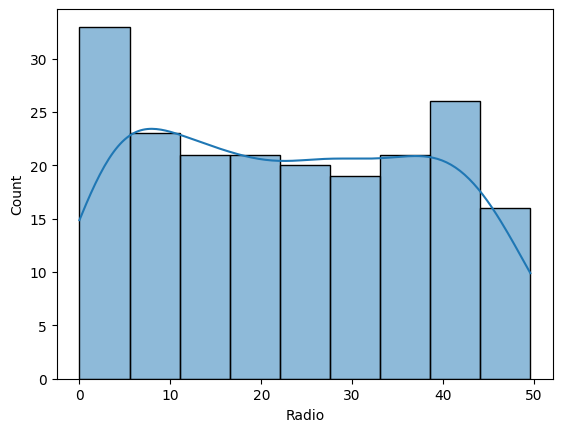

In [93]:

sns.histplot(df['Radio'], kde=True)

In [94]:

df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [95]:

x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [96]:

y = df.iloc[:,-1:]

In [97]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain, ytrain


(        TV  Radio  Newspaper
 79   116.0    7.7       23.1
 197  177.0    9.3        6.4
 38    43.1   26.7       35.1
 24    62.3   12.6       18.3
 122  224.0    2.4       15.6
 ..     ...    ...        ...
 106   25.0   11.0       29.7
 14   204.1   32.9       46.0
 92   217.7   33.5       59.0
 179  165.6   10.0       17.6
 102  280.2   10.1       21.4
 
 [160 rows x 3 columns],
      Sales
 79    11.0
 197   12.8
 38    10.1
 24     9.7
 122   11.6
 ..     ...
 106    7.2
 14    19.0
 92    19.4
 179   12.6
 102   14.8
 
 [160 rows x 1 columns])

In [98]:
xtest,ytest

(        TV  Radio  Newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2
 115   75.1   35.0       52.7
 69   216.8   43.9       27.2
 170   50.0   11.6       18.4
 174  222.4    3.4       13.1
 45   175.1   22.5       31.5
 66    31.5   24.6        2.2
 182   56.2    5.7       29.7
 165  234.5    3.4       84.8
 78     5.4   29.9        9.4
 186  139.5    2.1       26.6
 177  170.2    7.8       35.2
 56     7.3   28.1       41.4
 152  197.6   23.3       14.2
 82    75.3   20.3       32.5
 68   237.4   27.5       11.0
 124  229.5   32.3       74.2
 16    67.8   36.6      114.0
 148   38.0   40.3       11.9
 93   250.9   36.5       72.3
 65    69.0    9.3        0.9
 60    53.5    2.0       21.4
 84   213.5   43.0       33.8
 67   139.3   14.5       10.2
 125   87.2   11.8       25.9
 132    8.4   27.2        2.1
 9    199.8    2.6       21.2
 18    69.2   20.5       18.3
 55   198.

# Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
model = LinearRegression()

In [100]:

model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:

ypred=model.predict(xtest)
ypred

array([[16.4080242 ],
       [20.88988209],
       [21.55384318],
       [10.60850256],
       [22.11237326],
       [13.10559172],
       [21.05719192],
       [ 7.46101034],
       [13.60634581],
       [15.15506967],
       [ 9.04831992],
       [ 6.65328312],
       [14.34554487],
       [ 8.90349333],
       [ 9.68959028],
       [12.16494386],
       [ 8.73628397],
       [16.26507258],
       [10.27759582],
       [18.83109103],
       [19.56036653],
       [13.25103464],
       [12.33620695],
       [21.30695132],
       [ 7.82740305],
       [ 5.80957448],
       [20.75753231],
       [11.98138077],
       [ 9.18349576],
       [ 8.5066991 ],
       [12.46646769],
       [10.00337695],
       [21.3876709 ],
       [12.24966368],
       [18.26661538],
       [20.13766267],
       [14.05514005],
       [20.85411186],
       [11.0174441 ],
       [ 4.56899622]])

In [102]:

model.score(xtrain,ytrain)*100

89.57008271017818

In [103]:

model.score(xtest,ytest)*100

89.9438024100912

In [104]:

mean_squared_error(ytest,ypred)

3.1740973539761033

In [105]:

mean_absolute_error(ytest,ypred)

1.4607567168117603

In [106]:

r2_score(ytest,ypred)*100

89.9438024100912

In [107]:

rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

np.float64(1.78159966153345)

In [108]:

cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [109]:

scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

np.float64(0.8910650514774895)

In [110]:

param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [111]:

grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model


,estimator,LinearRegression()
,param_grid,"{'copy_X': [True], 'fit_intercept': [True], 'n_jobs': [-1, 1, ...], 'normalize': ['deprecated'], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,True


In [112]:
# Remove 'normalize' from param_grid and re-instantiate grid_model
param_grid_fixed = {
	'copy_X': [True],
	'n_jobs': [-1, 1, 2, -2],
	'positive': [False],
	'fit_intercept': [True]
}
grid_model = GridSearchCV(model, param_grid=param_grid_fixed, n_jobs=-1, cv=5)
grid_model.fit(xtrain, ytrain)
grid_model.fit(xtrain,ytrain)
grid_model.best_params_
grid_model.best_score_*100

np.float64(85.94884313276513)

In [113]:

model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:

model.predict(xtest)

array([[16.4080242 ],
       [20.88988209],
       [21.55384318],
       [10.60850256],
       [22.11237326],
       [13.10559172],
       [21.05719192],
       [ 7.46101034],
       [13.60634581],
       [15.15506967],
       [ 9.04831992],
       [ 6.65328312],
       [14.34554487],
       [ 8.90349333],
       [ 9.68959028],
       [12.16494386],
       [ 8.73628397],
       [16.26507258],
       [10.27759582],
       [18.83109103],
       [19.56036653],
       [13.25103464],
       [12.33620695],
       [21.30695132],
       [ 7.82740305],
       [ 5.80957448],
       [20.75753231],
       [11.98138077],
       [ 9.18349576],
       [ 8.5066991 ],
       [12.46646769],
       [10.00337695],
       [21.3876709 ],
       [12.24966368],
       [18.26661538],
       [20.13766267],
       [14.05514005],
       [20.85411186],
       [11.0174441 ],
       [ 4.56899622]])

In [115]:

model.score(xtrain,ytrain)*100

89.57008271017818

In [116]:

model.score(xtest,ytest)*100

89.9438024100912

In [117]:

ridgemodel =Ridge()
ridgemodel

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [118]:

# Remove 'normalize' from param_ridge and define param_ridge_fixed
param_ridge_fixed = {
	'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3, 0.6, 0.9],
	'fit_intercept': [True],
	'copy_X': [True],
	'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
	'tol': [0.001, 0.004, 0.002, 0.003],
	'solver': ['auto', 'saga'],
	'positive': [True],
	'random_state': [0]
}

ridge_model = GridSearchCV(ridgemodel, param_grid=param_ridge_fixed, cv=5)
ridge_model.fit(xtrain, ytrain)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site

,estimator,Ridge()
,param_grid,"{'alpha': [1.0, 0.01, ...], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [1000, 2000, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,3


In [119]:
ridgepred = ridge_model.predict(xtest)
ridge_model.score(xtrain,ytrain)

0.895700822742198

In [120]:

ridge_model.score(xtest,ytest)

0.8994396610242

In [121]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9004013443377963

In [122]:

lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [123]:

# Remove 'normalize' from lasso_grid_para
lasso_grid_para_fixed = {
    'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
    'fit_intercept': [True],
    'copy_X': [True],
    'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
    'positive': [False],
    'random_state': [0],
    'selection': ['cyclic']
}

grid_model_lasso = GridSearchCV(lasso,
    param_grid=lasso_grid_para_fixed,
    n_jobs=-1,
    cv=5)
grid_model_lasso.fit(xtrain, ytrain)

,estimator,Lasso()
,param_grid,"{'alpha': [1.0, 0.01, ...], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [1000, 2000, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


In [124]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [125]:

grid_model_lasso.set_params()

,estimator,Lasso()
,param_grid,"{'alpha': [1.0, 0.01, ...], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [1000, 2000, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


In [126]:

grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9004013443377963